<a href="https://colab.research.google.com/github/CrisMcode111/DI_Bootcamp/blob/main/week2_day4_superstore.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Daily Challenge: Strategic Analysis of Superstore Performance
You’ll build a complete business intelligence report in a Jupyter Notebook using the US Superstore dataset. This will include interactive visualizations, deep-dive diagnostics, and strategic recommendations that simulate the role of a data analyst for a national retailer.



What Will You Use
Concepts: diagnostic analysis, exploratory vs. explanatory visualizations, profit margin, strategic KPIs
Libraries: Pandas, Matplotlib, Seaborn, ipywidgets
Techniques: time-series analysis, geographic analysis, discount strategy diagnostics, interactive dashboards


Your Task
1. Data Scoping and Preparation

Download and load the US Superstore dataset. Begin with a preliminary data assessment
Clean and preprocess your data:

🧹 Handle missing values and duplicates
Use appropriate methods (dropna(), fillna(), or imputation) and justify your choices for each case in markdown cells.
🕓 Fix data types
Ensure that date columns are converted to datetime objects using pd.to_datetime() for time-series analysis.
🏗️ Feature engineering
Create new features to enrich your analysis:
Profit Margin = (Profit / Sales) * 100
Order Year (e.g., df['Order Date'].dt.year)
Order Month (e.g., df['Order Date'].dt.month)

2. Deep-Dive Exploratory Analysis (Matplotlib)

📈 Time-Series Trend Analysis
Create a line plot of total monthly Sales across all years using Matplotlib.
Add interactivity with ipywidgets.Dropdown to select a Product Category, dynamically updating the chart.

🔎 Look for patterns: seasonality, year-over-year changes, product-specific trends.

🗺️ Geographic Sales Performance
Build a horizontal bar chart showing total sales by State, sorted by amount.
Add a Top N slider widget to dynamically filter the number of displayed states.

💬 Identify high-performing states. Are sales centralized or geographically distributed?
🗺️ Geographic Sales Performance
Build a horizontal bar chart showing total sales by State, sorted by amount.
Add a Top N slider widget to dynamically filter the number of displayed states.

🔍 Discount vs Profit Scatter Plot
Use sns.scatterplot() to visualize the relationship between Discount and Profit.
- Add hue=Product Category to reveal category-level trends.
- Overlay a regplot() to visualize trend lines.

❗ What discount level starts correlating with consistent losses? Varying trends by category?
4. Methodology and Tooling Review

Create a markdown cell with a comparative evaluation of Matplotlib vs. Seaborn

Recommendation Template:

“For rapid exploration, I will use Matplotlib because it offers faster rendering for basic plots and seamless integration with interactive widgets for dynamic analysis.
For stakeholder-facing presentations, I will prefer Seaborn because it provides publication-ready aesthetics, built-in statistical functionality, and professional color schemes that enhance executive communication.”



5. Final Deliverable

Your Jupyter Notebook should include:

✅ Professional structure: Markdown headers, clear code comments
📊 Visualizations: Interactive and static, diagnostic and explanatory
📝 Executive Summary: Top 3–5 bullet points summarizing key findings
Recommendation Template:

“For rapid exploration, I will use Matplotlib because it offers faster rendering for basic plots and seamless integration with interactive widgets for dynamic analysis.
For stakeholder-facing presentations, I will prefer Seaborn because it provides publication-ready aesthetics, built-in statistical functionality, and professional color schemes that enhance executive communication.”

Submit your Daily Challenge
Upload your polished Jupyter Notebook with full analysis and recommendations to GitHub.


In [4]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

!pip -q install ipywidgets
import ipywidgets as widgets
from ipywidgets import interact, Dropdown, IntSlider
from IPython.display import display

import kagglehub

# Download latest version
path = kagglehub.dataset_download("vivek468/superstore-dataset-final")

print("Path to dataset files:", path)

import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = (10, 5)
plt.rcParams['axes.grid'] = True


Using Colab cache for faster access to the 'superstore-dataset-final' dataset.
Path to dataset files: /kaggle/input/superstore-dataset-final


In [5]:
import os

print(os.listdir("/kaggle/input/superstore-dataset-final"))


['Sample - Superstore.csv']


In [8]:
import os
import pandas as pd

base = "/kaggle/input/superstore-dataset-final"
files = os.listdir(base)
print("Files in folder:", files)

csv_path = [f for f in files if f.lower().endswith(".csv")][0]
csv_path = f"{base}/{csv_path}"
print("Reading:", csv_path)

try:
    df = pd.read_csv(csv_path, sep=None, engine="python", encoding="utf-8-sig")
except UnicodeDecodeError:
    try:
        df = pd.read_csv(csv_path, sep=None, engine="python", encoding="latin-1")
    except UnicodeDecodeError:
        df = pd.read_csv(csv_path, sep=None, engine="python", encoding="cp1252", on_bad_lines="skip")

df.columns = df.columns.str.replace('\xa0', ' ', regex=False).str.strip()
for c in df.select_dtypes(include="object").columns:
    df[c] = df[c].astype(str).str.replace('\xa0', ' ', regex=False).str.strip()

print("Shape:", df.shape)
print("Columns:", df.columns.tolist()[:12], "...")
df.head()


Files in folder: ['Sample - Superstore.csv']
Reading: /kaggle/input/superstore-dataset-final/Sample - Superstore.csv
Shape: (9994, 21)
Columns: ['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code'] ...


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [9]:
import numpy as np

rename_map = {
    'Order_Date':'Order Date','Ship_Date':'Ship Date','Product_Name':'Product Name',
    'Postal_Code':'Postal Code','Customer_Segment':'Segment'
}
df = df.rename(columns={k:v for k,v in rename_map.items() if k in df.columns})


for c in ['Order Date','Ship Date']:
    if c in df.columns: df[c] = pd.to_datetime(df[c], errors='coerce')

for c in ['Sales','Profit','Discount']:
    if c in df.columns: df[c] = pd.to_numeric(df[c], errors='coerce')

if {'Profit','Sales'}.issubset(df.columns):
    df['Profit Margin'] = (df['Profit'] / df['Sales']) * 100

if 'Order Date' in df.columns:
    df['Order Year'] = df['Order Date'].dt.year
    df['Order Month'] = df['Order Date'].dt.month
    df['Order Month-Year'] = df['Order Date'].dt.to_period('M')

df.head()


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Profit Margin,Order Year,Order Month,Order Month-Year
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,16.00,2016,11,2016-11
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,30.00,2016,11,2016-11
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,47.00,2016,6,2016-06
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,-40.00,2015,10,2015-10
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,11.25,2015,10,2015-10


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import interact, Dropdown

assert 'Sales' in df.columns, "Put Sales column in dataset."

def plot_monthly_sales(category='All'):
    plt.figure(figsize=(12,6))
    if 'Order Month-Year' not in df.columns:
        raise ValueError("don't have Order Date/Order Month-Year for time-series.")

    if category == 'All' or 'Category' not in df.columns:
        total = df.groupby('Order Month-Year')['Sales'].sum().sort_index()
        plt.plot(total.index.to_timestamp(), total.values, marker='o', linewidth=2)
        plt.title('Monthly Sales Trend – All', fontsize=14)
    else:
        monthly = (df.groupby(['Order Month-Year','Category'])['Sales']
                     .sum().reset_index())
        monthly['Date'] = monthly['Order Month-Year'].dt.to_timestamp()
        mcat = monthly[monthly['Category']==category]
        plt.plot(mcat['Date'], mcat['Sales'], marker='o', linewidth=2)
        plt.title(f'Monthly Sales Trend – {category}', fontsize=14)

    plt.xlabel('Date'); plt.ylabel('Sales ($)'); plt.xticks(rotation=45); plt.tight_layout(); plt.show()

if 'Category' in df.columns:
    categories = ['All'] + sorted(df['Category'].dropna().unique().tolist())
else:
    categories = ['All']

interact(plot_monthly_sales, category=Dropdown(options=categories, value='All', description='Category:'))


interactive(children=(Dropdown(description='Category:', options=('All', 'Furniture', 'Office Supplies', 'Techn…

<function __main__.plot_monthly_sales(category='All')>

In [11]:
from ipywidgets import IntSlider

if 'State' in df.columns:
    state_sales = df.groupby('State')['Sales'].sum().sort_values()

    def plot_top_states(top_n=10):
        top_states = state_sales.tail(top_n)
        h = max(6, top_n*0.4)
        plt.figure(figsize=(12,h))
        plt.barh(range(len(top_states)), top_states.values)
        plt.yticks(range(len(top_states)), top_states.index)
        plt.xlabel('Total Sales ($)'); plt.title(f'Top {top_n} States by Sales')
        for i,(st,val) in enumerate(top_states.items()):
            plt.text(val*1.01, i, f'${val:,.0f}', va='center', fontsize=10)
        plt.tight_layout(); plt.show()

    interact(plot_top_states, top_n=IntSlider(min=5, max=min(25, len(state_sales)), value=min(10, len(state_sales))))
else:
    print("Note: dataset don't have State.")


interactive(children=(IntSlider(value=10, description='top_n', max=25, min=5), Output()), _dom_classes=('widge…

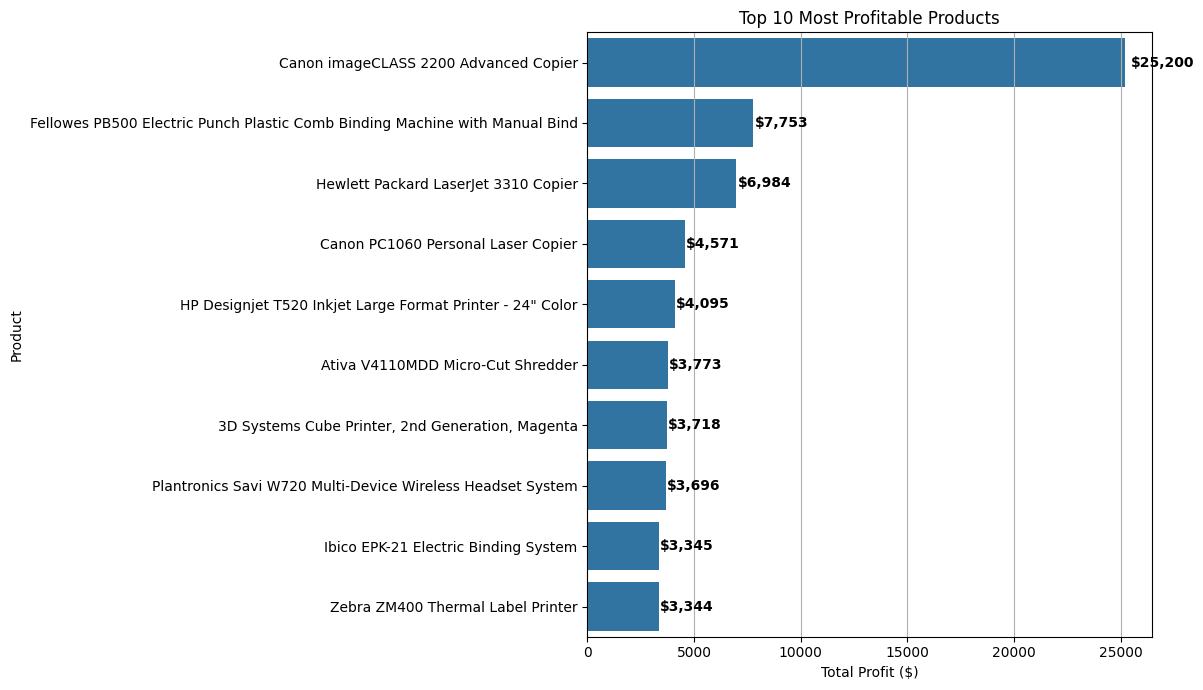

In [12]:
if {'Product Name','Profit'}.issubset(df.columns):
    prod_profit = df.groupby('Product Name')['Profit'].sum().sort_values(ascending=False).head(10)
    plt.figure(figsize=(12,7))
    ax = sns.barplot(x=prod_profit.values, y=prod_profit.index, orient='h')
    plt.title('Top 10 Most Profitable Products'); plt.xlabel('Total Profit ($)'); plt.ylabel('Product')
    for i,(name,val) in enumerate(prod_profit.items()):
        ax.text(val*1.01, i, f'${val:,.0f}', va='center', fontsize=10, fontweight='bold')
    plt.tight_layout(); plt.show()
else:
    print("Lack Product Name/Profit.")


## 4) Methodology & Tooling Review

**Matplotlib – strengths**
- Fine-grained control over every element of the plot.
- Easy integration with `ipywidgets` for interactive analysis.
- Fast for quick prototyping and exploratory visuals.

**Seaborn – strengths**
- Clean, publication-ready default style.
- Automatic color palettes and legends.
- Built-in statistical visualizations (e.g., `regplot`, `boxplot`, `catplot`).
- Very convenient for categorical data comparisons.

**Limitations**
- Matplotlib: requires more code to make charts look polished.
- Seaborn: less control for highly customized layouts.

**Recommendation**
- For *rapid exploration*: Matplotlib (+ ipywidgets) is more efficient.  
- For *stakeholde*


In [15]:
import time

# Agregare simplă: Sales per Year
annual = df.groupby('Order Year')['Sales'].sum().sort_index()
annual_df = annual.reset_index().rename(columns={'Order Year':'Year'})

# Matplotlib timing
start = time.time()
plt.figure(figsize=(8,5))
plt.plot(annual.index, annual.values)
plt.close()
mt = time.time() - start

# Seaborn timing
start = time.time()
plt.figure(figsize=(8,5))
sns.lineplot(data=annual_df, x='Year', y='Sales')
plt.close()
st = time.time() - start

print("=== Library Comparison ===")
print(f"Matplotlib plot: {mt:.4f} s")
print(f"Seaborn plot : {st:.4f} s")


=== Library Comparison ===
Matplotlib plot: 0.0121 s
Seaborn plot : 0.0581 s


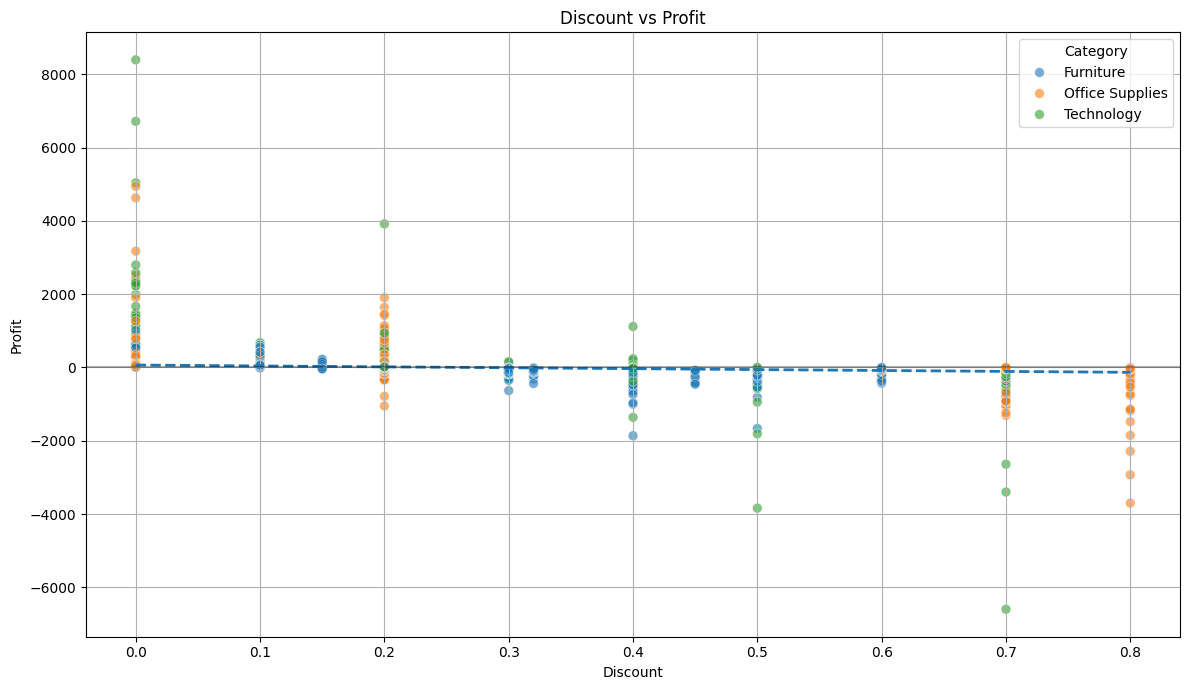

>20% discount rows: 1,393 | Avg profit: $-97.18 | Loss rate: 96.8%


In [13]:
if {'Discount','Profit'}.issubset(df.columns):
    plt.figure(figsize=(12,7))
    if 'Category' in df.columns:
        sns.scatterplot(data=df, x='Discount', y='Profit', hue='Category', alpha=0.6, s=50)
    else:
        sns.scatterplot(data=df, x='Discount', y='Profit', alpha=0.6, s=50)

    sns.regplot(data=df, x='Discount', y='Profit', scatter=False, line_kws={'linewidth':2,'linestyle':'--'})
    plt.axhline(0, color='black', alpha=0.3); plt.title('Discount vs Profit'); plt.tight_layout(); plt.show()

    high = df[df['Discount']>0.2]
    print(f">20% discount rows: {len(high):,} | Avg profit: ${high['Profit'].mean():.2f} | Loss rate: {(high['Profit']<0).mean()*100:.1f}%")
else:
    print("Lack Discount/Profit.")


In [14]:
total_sales  = df['Sales'].sum() if 'Sales' in df.columns else np.nan
total_profit = df['Profit'].sum() if 'Profit' in df.columns else np.nan
pm = (total_profit/total_sales)*100 if pd.notna(total_sales) and total_sales!=0 else np.nan

print("=== EXECUTIVE SUMMARY ===")
print(f"• Revenue: ${total_sales:,.0f}")
print(f"• Profit:  ${total_profit:,.0f}")
print(f"• Profit Margin: {pm:.1f}%")

if 'State' in df.columns:
    state_sales = df.groupby('State')['Sales'].sum().sort_values()
    print(f"• Top State: {state_sales.index[-1]} (${state_sales.iloc[-1]:,.0f})")

if {'Product Name','Profit'}.issubset(df.columns):
    prod_profit = df.groupby('Product Name')['Profit'].sum().sort_values(ascending=False).head(1)
    print(f"• Most profitable product: {prod_profit.index[0]} (${prod_profit.iloc[0]:,.0f})")

if {'Discount','Profit'}.issubset(df.columns):
    loss_rate = (df[df['Discount']>0.2]['Profit']<0).mean()*100
    print(f"• Risk: {loss_rate:.1f}% of sales with >20% discount are loss-making")


=== EXECUTIVE SUMMARY ===
• Revenue: $2,297,201
• Profit:  $286,397
• Profit Margin: 12.5%
• Top State: California ($457,688)
• Most profitable product: Canon imageCLASS 2200 Advanced Copier ($25,200)
• Risk: 96.8% of sales with >20% discount are loss-making
